# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
#Importing the DataSet

df = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/SeoulBikeData.csv")
df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday,Yes


In [3]:
# Now we will try to understand the general information about our data. This includes understanding the different datatypes of each features/columns present in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
# Now that we know about each features  datatype , lets grab some statistical information about our dataset. 
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


###### As we can see , we know some statistical information of our dataset which includes, the minimum values, maximum values, mean , standard deviation , the counts as well as different perecntiles. Now we will try to get the unique counts of all features. This will tell us all distinct values present in each of our features/columns

In [5]:
print(f'Unique count of dates: ', df['Date'].nunique())
print(f'Unique count of hours: ',df['Hour'].nunique())
print(f'Unique count of temperatures: ',df['Temperature (C)'].nunique())
print(f'Unique count of humidity: ',df['Humidity (%)'].nunique())
print(f'Unique count of windspeeds ',df['Wind speed (m/s)'].nunique())
print(f'Unique count of visibility : ',df['Visibility (10m)'].nunique())
print(f'Unique count of dew points: ',df['Dew point temperature (C)'].nunique())
print(f'Unique count of solar radiations: ',df['Solar Radiation (MJ/m2)'].nunique())
print(f'Unique count of rainfall : ',df['Rainfall(mm)'].nunique())
print(f'Unique count of snowfall : ',df['Snowfall (cm)'].nunique())
print(f'Unique values of seasons: ',df['Seasons'].unique())
print(f'Unique values of holidays: ',df['Holiday'].unique())
print(f'Unique values of functioning days: ',df['Functioning Day'].unique())



Unique count of dates:  365
Unique count of hours:  24
Unique count of temperatures:  550
Unique count of humidity:  92
Unique count of windspeeds  69
Unique count of visibility :  1789
Unique count of dew points:  556
Unique count of solar radiations:  347
Unique count of rainfall :  62
Unique count of snowfall :  54
Unique values of seasons:  ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values of holidays:  ['No Holiday' 'Holiday']
Unique values of functioning days:  ['Yes' 'No']


###### Data Visualization



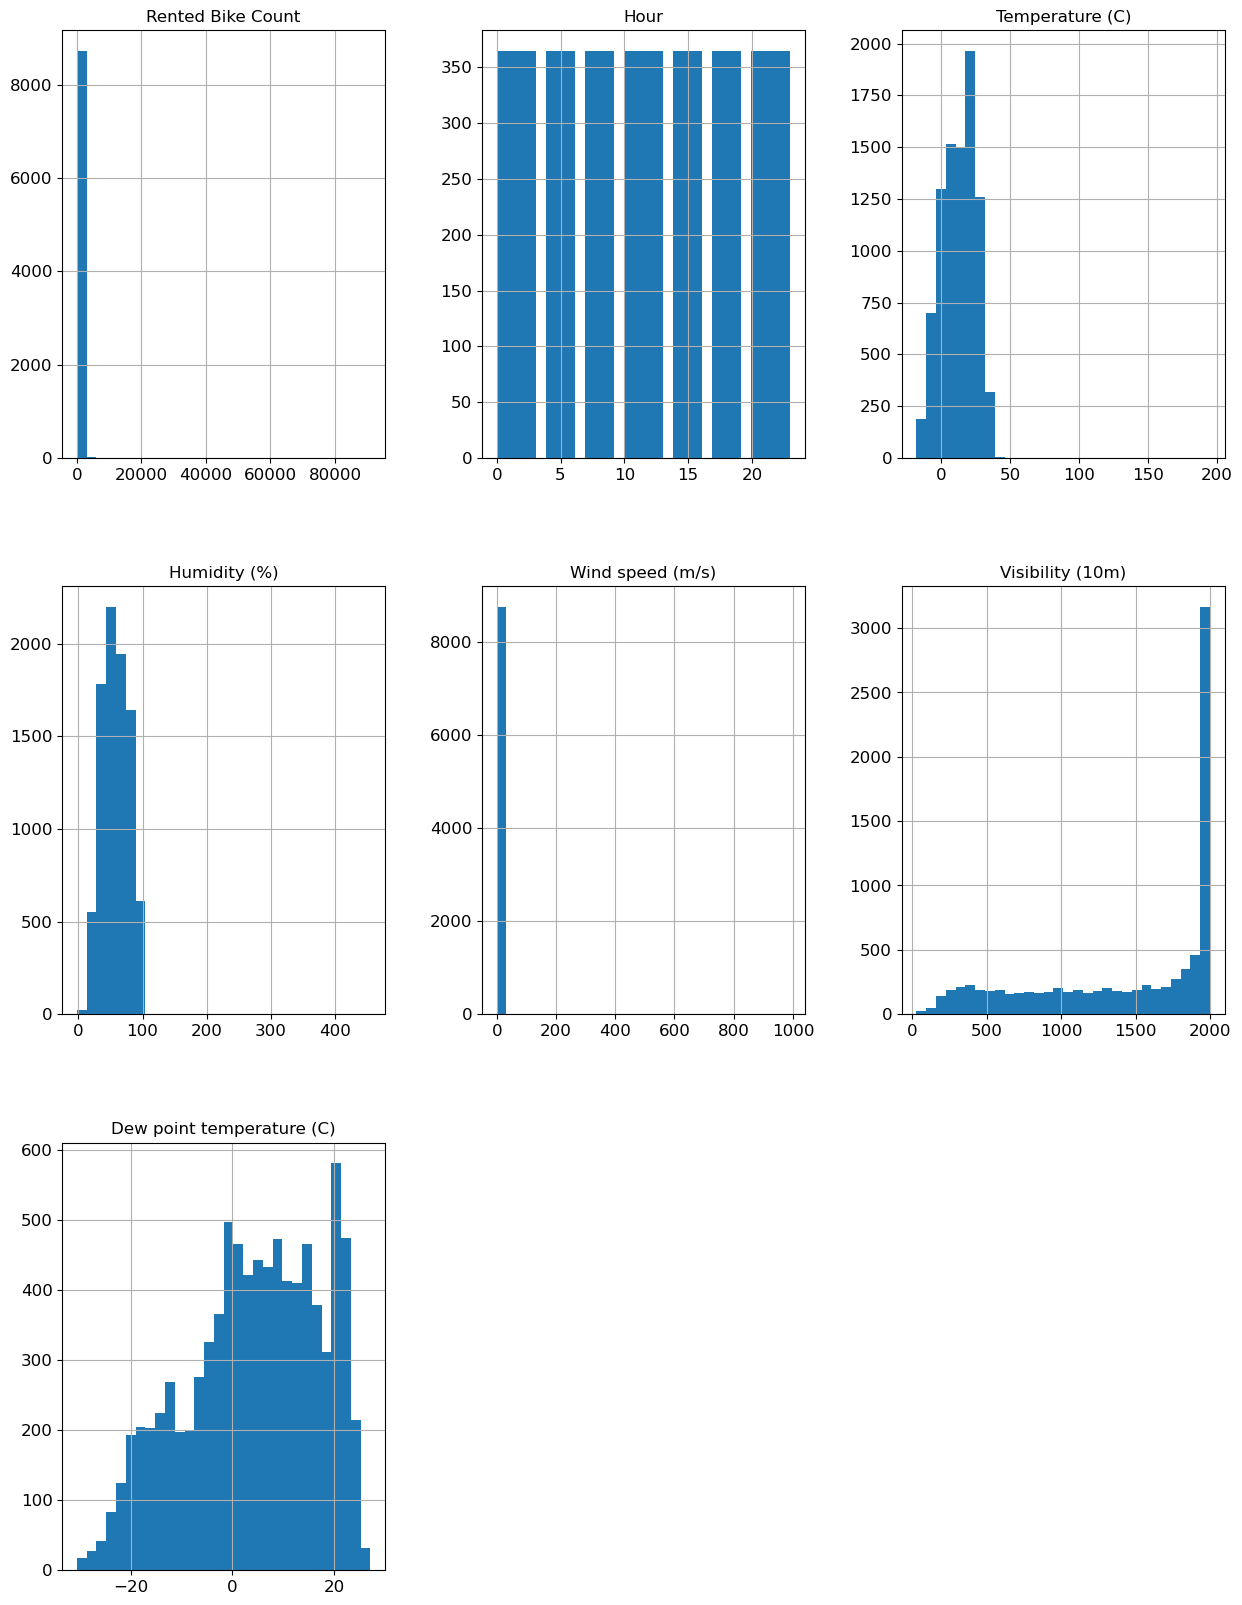

In [6]:
#Before beginning with data cleaning we , would initiate the process of data Visualization. 
# The following are the reasons for visualizing the data with the help of different plots and graphs
#1) Identifying the trends and patterns , Visualization can help in identifying trends,patterns and correlations in our dataset.
#2) Increases the speed of Decision making : Visual data helps in making quick decisions and give clear insights
#3) Visualization can tell us about the anomalies and outliers , which will in turn increase the accuracy of our models.
#4) Visualization helps every kind of audience to understand the analysis .

df_pre_data_clean = df.hist(bins=30,figsize=(15,20))
plt.show()



###### As we see by doing visualization before Data cleaning we were able to obtain some insights. Following are the observations obtained.

###### Observations

###### 1) With the help of some basic library known as pandas we were able plot the numerical features data.
###### 2) As we can see that features are normally distributed and are left/right skewed.

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [7]:
# For better and easy visualization we will perform the above tasks and name it in a sequence for example 1.2.1,1.2.2,1.2.3,1.2,4,1.2.5.


# 1.2.1 Using the "Functioning day" feature, remove rows from the DataFrame where the business is closed and then delete the Functioning Day feature from the DataFrame.
df = df.loc[df["Functioning Day"] == 'Yes'].copy()
print(f'No. of days with bike rental on a functional day: {len(df)}')
df_non_fun = df.loc[df["Functioning Day"] == 'No']
print(f'No. of days with bike rental on a non-functional day: {len(df_non_fun)}')


No. of days with bike rental on a functional day: 8465
No. of days with bike rental on a non-functional day: 0


In [8]:
# Delete the "Functioning Day" feature from the DataFrame
df.drop(columns=["Functioning Day"], inplace=True)



In [9]:
df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday


In [10]:
# As we can see we were able to remove  rows from the DataFrame where the business is closed and then delete the Functioning Day feature from the DataFrame.

In [11]:
# First we will check all unique(possible seasons)  present in season column before converting it into one encoded format
print("Unique values in 'Seasons' column:", df["Seasons"].unique())

Unique values in 'Seasons' column: ['Winter' 'Spring' 'Summer' 'Autumn']


In [12]:
# 1.2.2 Convert seasons to a one hot encoded format (1 binary feature for each of the 4 seasons).
df= pd.get_dummies(df,columns=["Seasons"], prefix="Season")

In [13]:
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1


In [14]:
# As we can see , we have created 4 dummy column for the feature Season and , each one of them has binary values

In [15]:
## Example code for weekday feature mapping ##
#Replace the Date feature with a binary Weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)
df['Weekday'] =df['Date'].apply(date_is_weekday)
df.drop(columns=["Date"], inplace = True)

In [16]:
df.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Weekday
0,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1,1


In [17]:
# As we can see , the column/Feature weekday was created however, we cannot see 0 for weekend since it is not dsiplayed by just writing df.head(), or df.tail()
df["Weekday"].unique()

array([1, 0], dtype=int64)

In [18]:
# 1.2.4 Convert remaining non-numerical features to a numerical format or replace with NaN (i.e. np.nan) where not possible.
non_numerical_cols = df.select_dtypes(include=['object']).columns

In [19]:
for col in non_numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the transformation
print("Data types of the DataFrame after conversion:")
print(df.dtypes)

Data types of the DataFrame after conversion:
Rented Bike Count              int64
Hour                           int64
Temperature (C)              float64
Humidity (%)                 float64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature (C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                      float64
Season_Autumn                  uint8
Season_Spring                  uint8
Season_Summer                  uint8
Season_Winter                  uint8
Weekday                        int64
dtype: object


In [20]:
### Your code here (and remember to upload the resulting csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8464 non-null   float64
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8444 non-null   float64
 10  Holiday                    0 non-null      float64
 11  Season_Autumn              8465 non-null   uint8  
 12  Season_Spring              8465 non-null   uint8  
 13  Season_Summer              8465 non-null   uint8

######  As we can we were able to Convert remaining non-numerical features to a numerical format or replace with NaN (i.e. np.nan) where not possible.


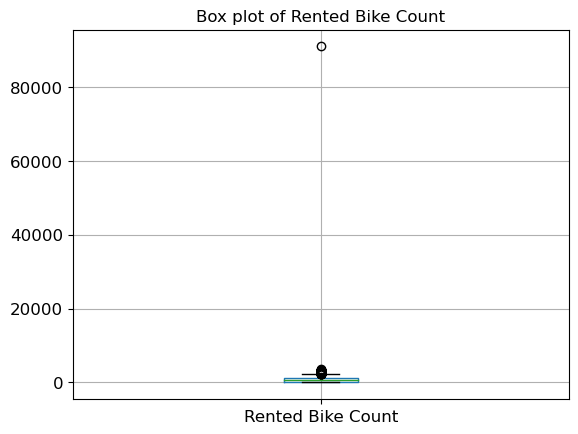

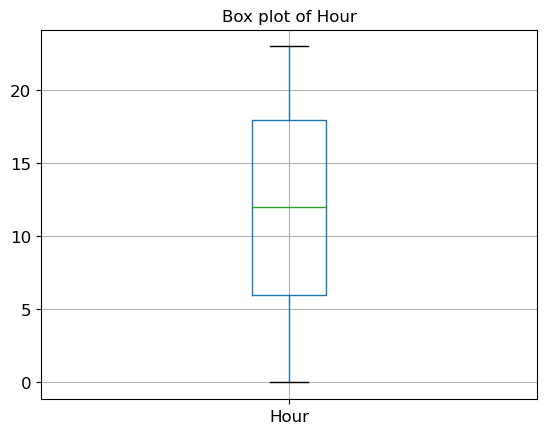

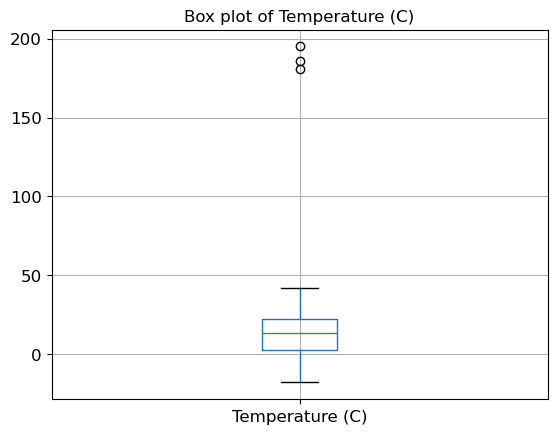

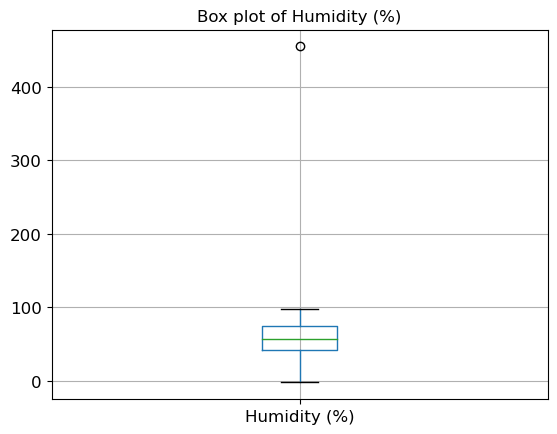

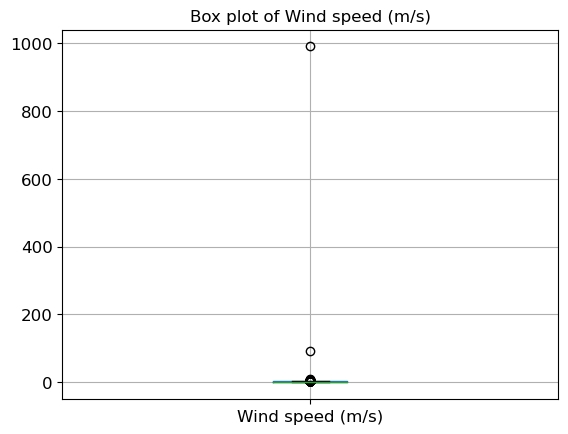

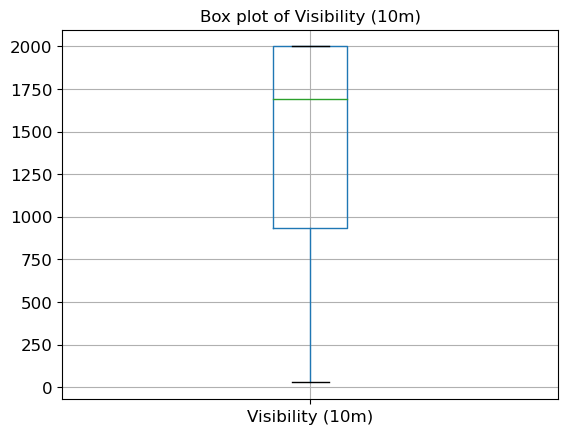

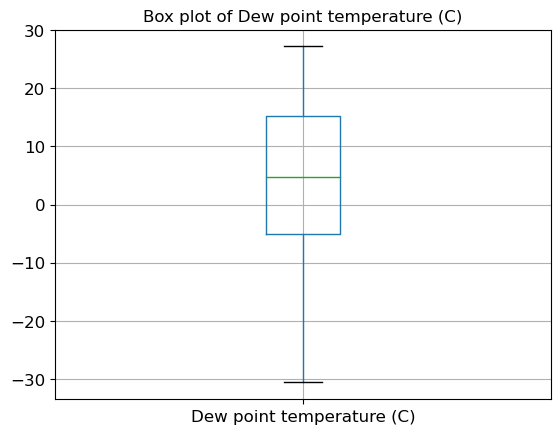

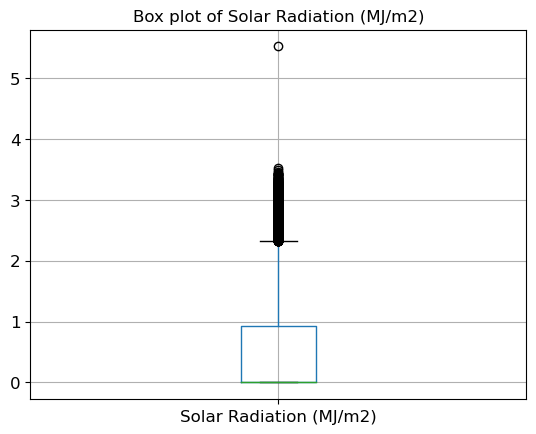

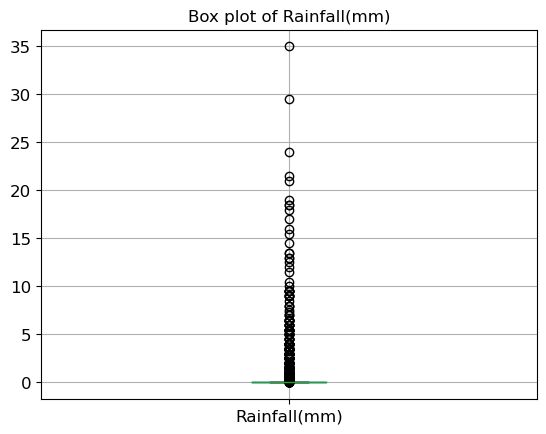

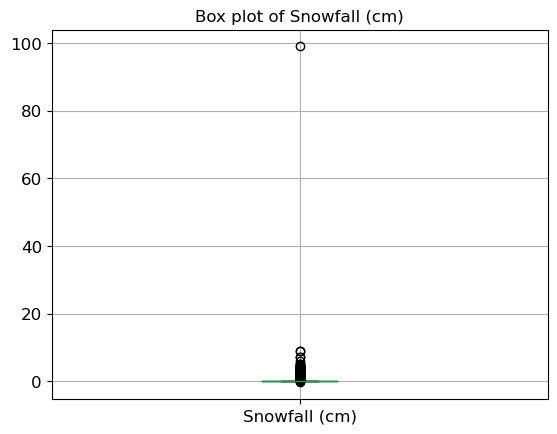

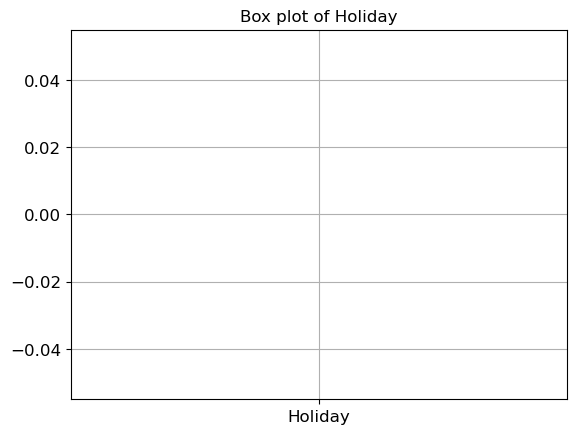

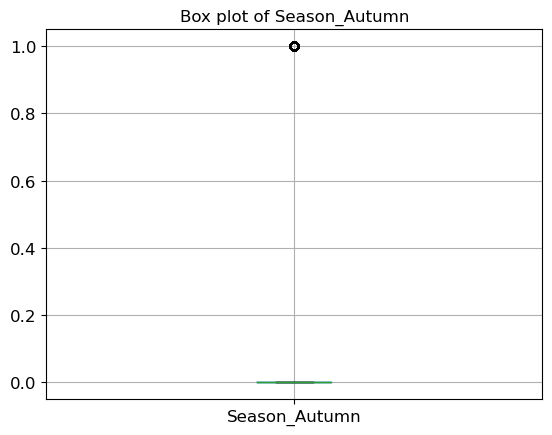

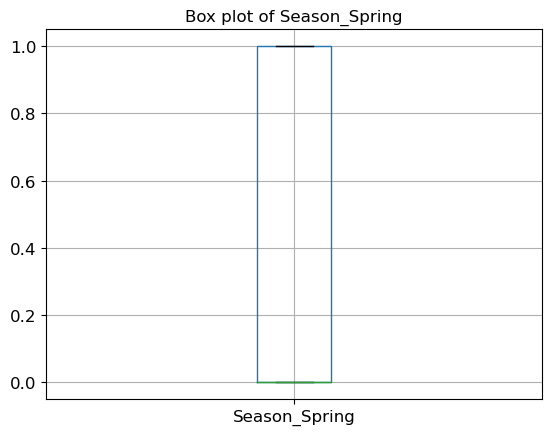

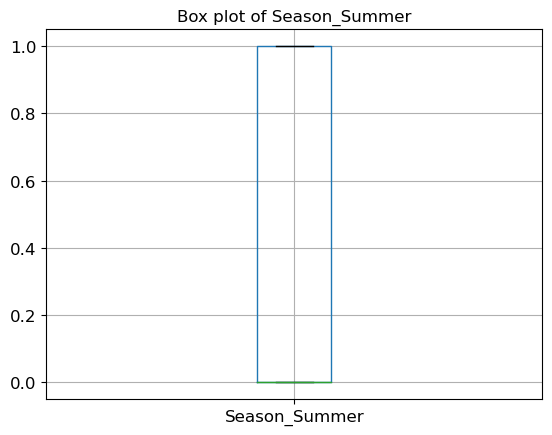

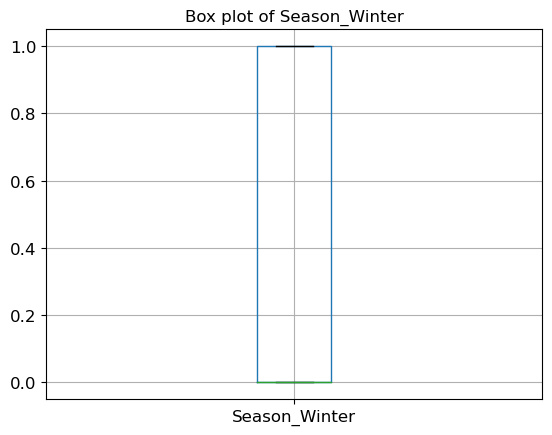

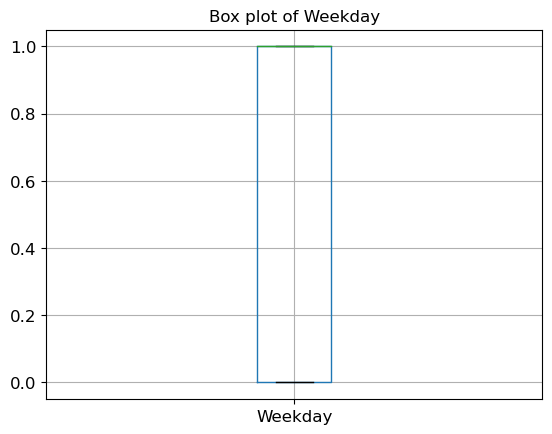

In [21]:
# 1.2.5 Identify and fix any outliers and errors in the data
# We will first try to identify whether there exist any outliers by visualization. We can achieve this with the help of boxplot


import matplotlib.pyplot as plt

for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df.boxplot([column])
    plt.title(f'Box plot of {column}')
    plt.show()


###### As we can see there exists some outliers for features like Season_Autmn, Snowfall(cm), Box plot of Rainfall(mm), Solar Radiation(Mj/m2), Wind speed (m/s), Humidity(%),Temperature(C),Rented Bike Count

###### Now we will use some statistics to ensure , there is some presence of outliers. Even after we have confirmed the presence of outliers, we will use InterQuartileRange(IQR method) to identify the outliers since , it will be later used again to remove the outliers

In [22]:
print(df.describe())

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8465.000000  8465.000000      8465.000000   8465.000000   
mean          739.789014    11.507029        12.836090     58.190408   
std          1172.685973     6.920899        12.545382     20.943092   
min             2.000000     0.000000       -17.800000     -2.200000   
25%           214.000000     6.000000         3.000000     42.000000   
50%           542.000000    12.000000        13.500000     57.000000   
75%          1084.000000    18.000000        22.700000     74.000000   
max         90997.000000    23.000000       195.000000    455.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8465.000000       8465.000000                8465.000000   
mean           1.854247       1433.873479                   3.944997   
std           10.847528        609.051229                  13.242399   
min           -0.700000         27.000000                 -30.6

In [23]:
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
print("DataFrame after further adjusting bounds based on IQR:")
print(df.describe())


DataFrame after further adjusting bounds based on IQR:
       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8465.000000  8465.000000      8465.000000   8465.000000   
mean          723.531483    11.507029        12.788216     58.151069   
std           624.633666     6.920899        12.129737     20.505837   
min             2.000000     0.000000       -17.800000     -2.200000   
25%           214.000000     6.000000         3.000000     42.000000   
50%           542.000000    12.000000        13.500000     57.000000   
75%          1084.000000    18.000000        22.700000     74.000000   
max          2389.000000    23.000000        52.250000    122.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8465.000000       8465.000000                8465.000000   
mean           1.717791       1433.873479                   3.944997   
std            1.007295        609.051229                  13.242399   
min     

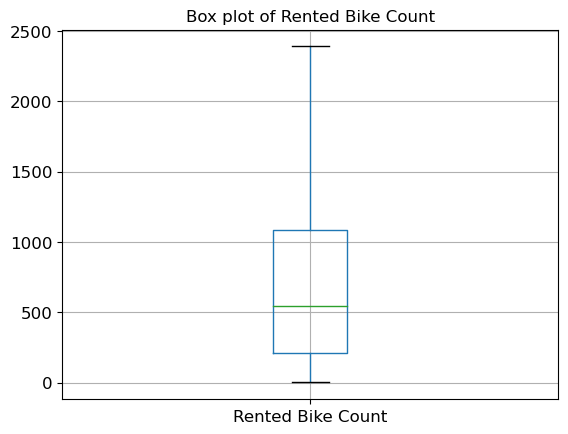

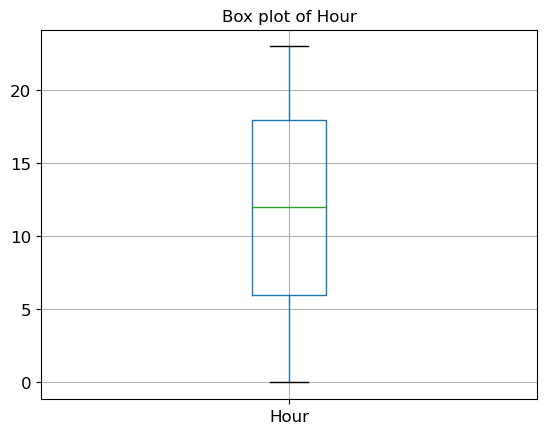

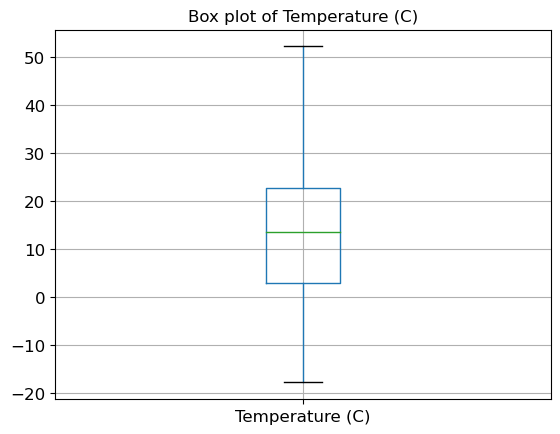

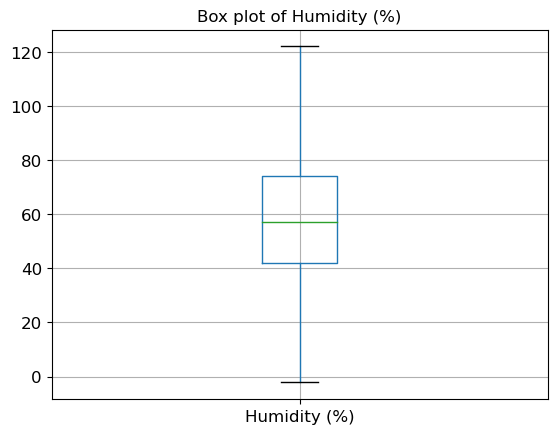

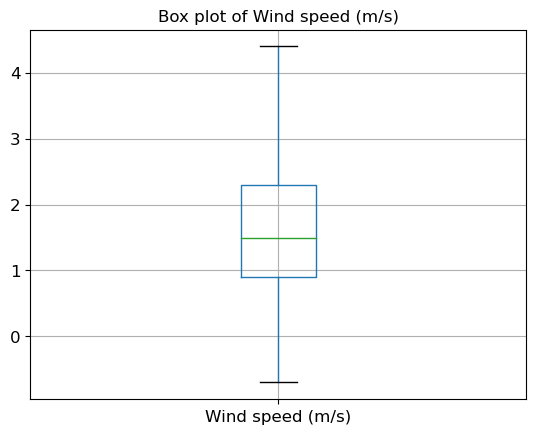

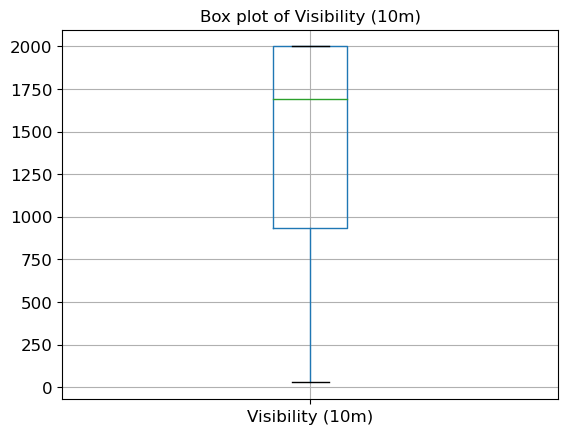

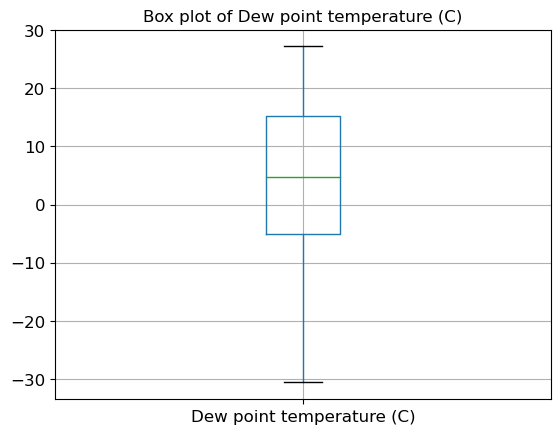

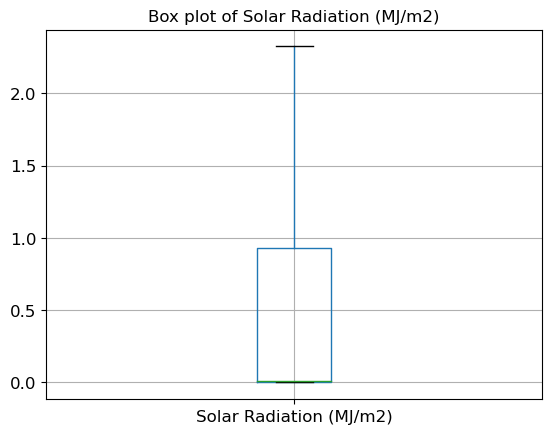

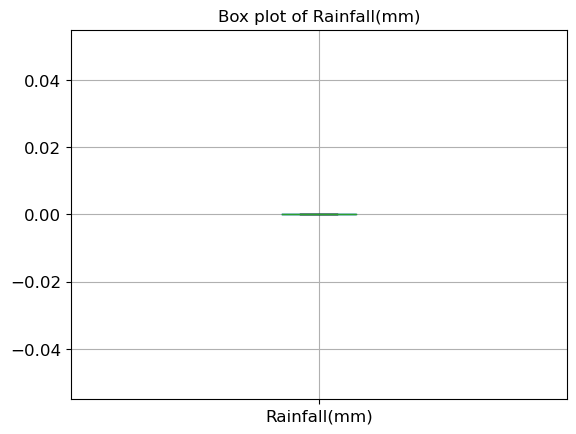

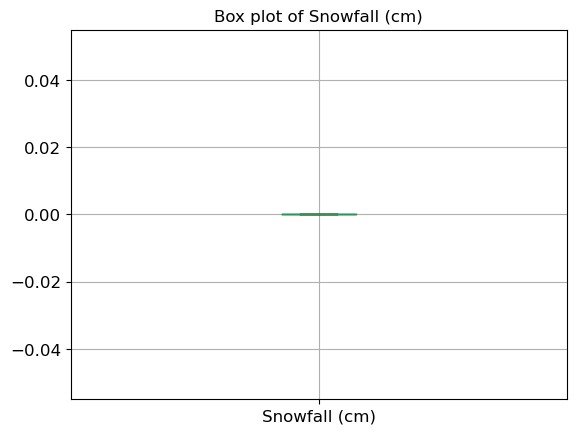

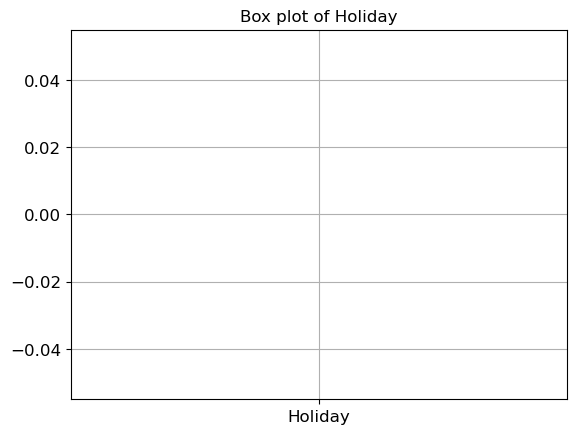

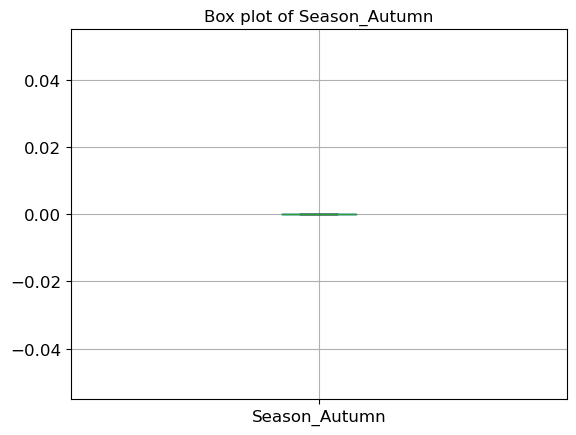

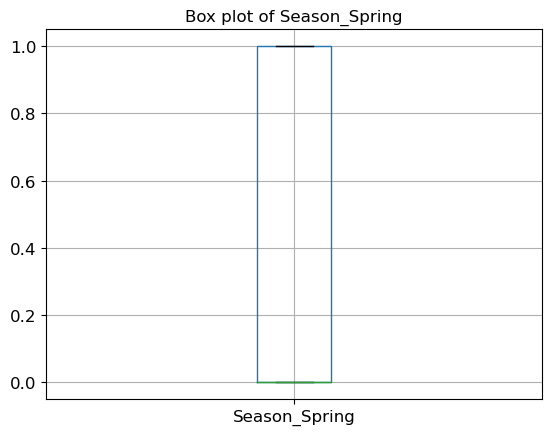

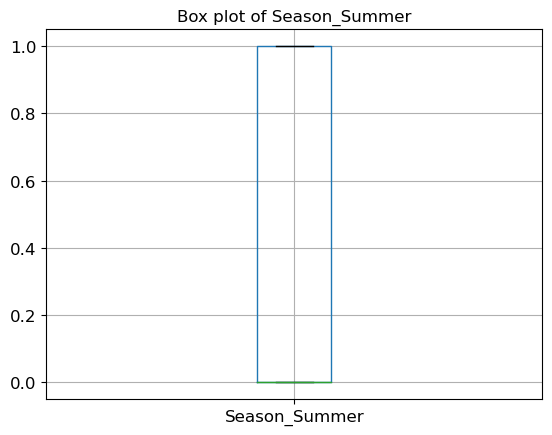

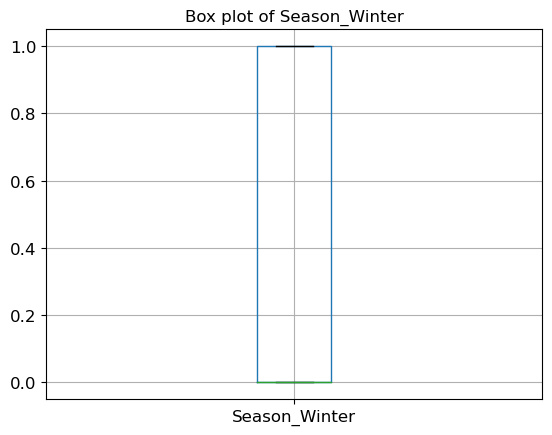

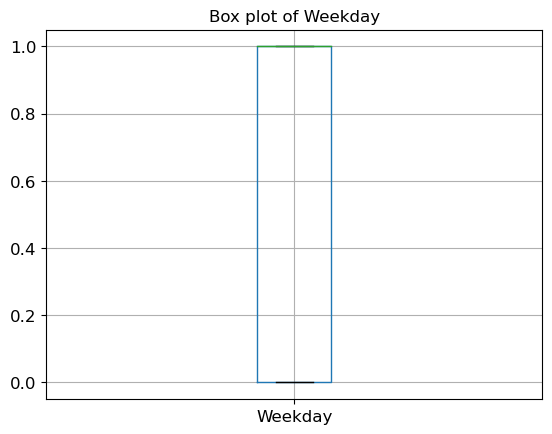

In [24]:


import matplotlib.pyplot as plt

for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df.boxplot([column])
    plt.title(f'Box plot of {column}')
    plt.show()


In [25]:
# As we can see the outliers and anomalities have been removed 

In [26]:
#Save the result as a new csv file called CleanedSeoulBikeData.csv and upload this to MyUni along with this notebook when you submit your assignment.
df.to_csv('CleanedSeoulBikeData.csv', index=False)
print("Cleaned data saved to 'CleanedSeoulBikeData.csv'")

Cleaned data saved to 'CleanedSeoulBikeData.csv'


## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [27]:
### Your code here
# Before we do the imputation lets begin with first checking existence of any NaN values
df.isna().sum()

Rented Bike Count               0
Hour                            0
Temperature (C)                 0
Humidity (%)                    0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature (C)       0
Solar Radiation (MJ/m2)         1
Rainfall(mm)                   21
Snowfall (cm)                  21
Holiday                      8465
Season_Autumn                   0
Season_Spring                   0
Season_Summer                   0
Season_Winter                   0
Weekday                         0
dtype: int64

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



df['Solar Radiation (MJ/m2)'] = np.where(df['Solar Radiation (MJ/m2)'] > 0, 1, 0)
df['Visibility (10m)'] = np.where(df['Visibility (10m)'] < 2000, 0, 1)

# Correct unrealistic values in Humidity (%)
df['Humidity (%)'] = df['Humidity (%)'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))

# Correct unrealistic values in Wind speed (m/s)
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].apply(lambda x: 0 if x < 0 else x)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

pipeline_steps = [
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())  
]



print(df.describe())

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8465.000000  8465.000000      8465.000000   8465.000000   
mean          723.531483    11.507029        12.788216     58.148730   
std           624.633666     6.920899        12.129737     20.498385   
min             2.000000     0.000000       -17.800000      0.000000   
25%           214.000000     6.000000         3.000000     42.000000   
50%           542.000000    12.000000        13.500000     57.000000   
75%          1084.000000    18.000000        22.700000     74.000000   
max          2389.000000    23.000000        52.250000    100.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8465.000000       8465.000000                8465.000000   
mean           1.717874          0.253987                   3.944997   
std            1.007125          0.435316                  13.242399   
min            0.000000          0.000000                 -30.6

In [29]:
# As we can see the features Rainfall & Snowfall had Nan values. The pipeline will bring them to the same scale.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   float64
 1   Hour                       8465 non-null   float64
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int32  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   int32  
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8444 non-null   float64
 10  Holiday                    0 non-null      float64
 11  Season_Autumn              8465 non-null   float64
 12  Season_Spring              8465 non-null   float64
 13  Season_Summer              8465 non-null   float

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [30]:
### Your code and outputs here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df.drop('Rented Bike Count', axis=1)  # Features (predictors)
y = df['Rented Bike Count']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the pipeline steps with scaling and linear regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler()),  # Standardize the features
    ('linearRegression', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('linearRegression', LinearRegression())])

In [31]:
y_train_pred = pipeline.predict(X_train)

# Calculate and print the RMSE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE on training data: {rmse_train}")

# Calculate the baseline RMSE (mean of training targets)
y_train_mean = np.mean(y_train)
y_train_baseline_pred = np.full_like(y_train, y_train_mean)
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_baseline_pred))
print(f"Baseline RMSE (mean prediction) on training data: {rmse_baseline}")

RMSE on training data: 424.1333557507128
Baseline RMSE (mean prediction) on training data: 627.5731999110692


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [32]:
### Your ChatGPT prompt
### Help me pipelines, can you tell me how can i use pipllines for my models. I have already done training and testing. I want to know where exactly should I use the pipleline in grid search.And give me a code for the parameters grid search.

# Code obtained with the help of chatgpt :- # perform a hyper-parameter optimisation on each model using GridSearch
#param_grid_svr = {
 #   'svr__C': [0.1, 1, 10],
  #  'svr__epsilon': [0.1, 0.2, 0.5],
   # 'svr__kernel': ['linear', 'rbf']
#}

#grid_search_svr = GridSearchCV(pipeline_svr, param_grid=param_grid_svr, cv=10, scoring=rmse_scorer)
#grid_search_svr.fit(X_train, y_train)

#best_svr_model = grid_search_svr.best_estimator_
#cv_scores_best_svr = cross_val_score(best_svr_model, X_train, y_train, cv=10, scoring=rmse_scorer)
# Also the idea of using scoring = rmse_scorer was given to me by chatGpt

In [33]:
### Code here (with outputs)
# So we will begin with defining the pipeline for linear regression and SupportVectorMachine
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
pipeline_lr = Pipeline(steps=pipeline_steps + [('linearRegression', LinearRegression())])

# Support Vector Regression
pipeline_svr = Pipeline(steps=pipeline_steps + [('svr', SVR())])
rmse_scorer = make_scorer(mean_squared_error, squared=False)



In [34]:
# Then we will fit a linear regression and a Support Vector Regression method to the data using 10-fold cross validation for each model
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=10, scoring=rmse_scorer)
mean_rmse_lr = np.mean(cv_scores_lr)
std_rmse_lr = np.std(cv_scores_lr)


In [35]:
# Perform 10-fold cross-validation for SVR
cv_scores_svr = cross_val_score(pipeline_svr, X_train, y_train, cv=10, scoring=rmse_scorer)
mean_rmse_svr = np.mean(cv_scores_svr)
std_rmse_svr = np.std(cv_scores_svr)

In [36]:
# Once we are done with that, we will display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets
print(f"Linear Regression - Mean RMSE: {mean_rmse_lr}, Std RMSE: {std_rmse_lr}")
print(f"SVR - Mean RMSE: {mean_rmse_svr}, Std RMSE: {std_rmse_svr}")


Linear Regression - Mean RMSE: 424.7823571568829, Std RMSE: 9.087783107131756
SVR - Mean RMSE: 516.6236379607329, Std RMSE: 12.603161455526504


In [37]:
# perform a hyper-parameter optimisation on each model using GridSearch
param_grid_svr = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__kernel': ['linear', 'rbf']
}

grid_search_svr = GridSearchCV(pipeline_svr, param_grid=param_grid_svr, cv=10, scoring=rmse_scorer)
grid_search_svr.fit(X_train, y_train)

best_svr_model = grid_search_svr.best_estimator_
cv_scores_best_svr = cross_val_score(best_svr_model, X_train, y_train, cv=10, scoring=rmse_scorer)

In [38]:
# display the mean and standard deviation of the RMSE values for each model (after optimisation) in the appropriate datasets
mean_rmse_best_svr = np.mean(cv_scores_best_svr)
std_rmse_best_svr = np.std(cv_scores_best_svr)
print(f"Optimized SVR - Mean RMSE: {mean_rmse_best_svr}, Std RMSE: {std_rmse_best_svr}")

Optimized SVR - Mean RMSE: 632.4751279152861, Std RMSE: 14.816819751090165


In [39]:
if mean_rmse_best_svr < mean_rmse_lr:
    best_model = best_svr_model
    model_name = "Optimized SVR"
else:
    best_model = pipeline_lr
    model_name = "Linear Regression"

# Fit the best model on the training data
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

Linear Regression - RMSE on test data: 410.870698340031


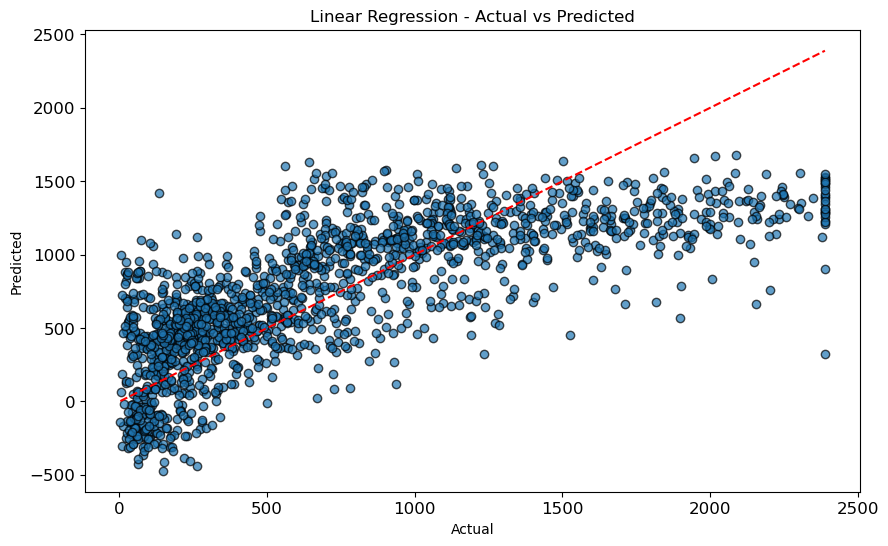

In [40]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"{model_name} - RMSE on test data: {rmse_test}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'{model_name} - Actual vs Predicted')
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [41]:
### Your answer here (maximum of 200 words)
# Honestly speaking, The use of ChatGpt was very limited , since the workflow is very similar to the workflows, used in subjects of Big Data Mining, Data Science Pg and Data Taming. However I would like to point out few things that I believe that few things could be improve. For example ChatGpt was not very keen on telling how the best model is chosen or how the model works on unseen data. Chatgpt belives that comparing the models visually is not a good method since, people who are not from IT background will choose the wrong model, which I think is partially true. I was expecting some feedback from Chatgpt on why the rmse is c high, but it told me its a good rmse score. Last thing Chatgpt accidentally gave me code for classification metrics ,but it covered up by saying classification is also possible here, which is something I totally missed.